# 1.- Importar las librerias

Primero es necesario importar algunas librerías que nos proporcionaran métodos o funciones para construir el modelo de regresión lineal. Las principales son ***pandas*** y ***numpy***, que se utilizan para todo el preprocesamiento de los datos.

Se utilizan algunas como ***matplotlib.pyplot*** y ***pandas.plotting*** para crear las graficas de los valores de los datos.

Y por último, se utilizan módulos de ***sklearn*** como ***linear_model*** para la regresión lineal, ***train_test_split*** para la partición de datos y ***sklearn.metrics*** para evaluar el modelo de regresión lineal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# 2.- Desarrollo: Proceso KDD

## 2.1.- Carga de la base de datos

La base de datos a utilizar tiene como nombre *iris.csv*. 
Utilizamos el método de pandas llamado **read_csv()** y mostramos la información y descripción de los atributos con **info()** y **describe()**.

In [2]:
data=pd.read_csv("iris.csv")
data.set_index("Id", inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### 2.1.1.- Información y descripción de los datos

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2.2.- Limpieza de datos

Si revisamos la existencia de registros nulos, notaremos que no los hay, por lo que no es necesario hacer una limpieza en la base de datos.

In [4]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2.3.- Integración y selección de los datos

## 2.3.1.- Correlación entre atributos

In [5]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002040AF8EC50>,
      dtype=object)

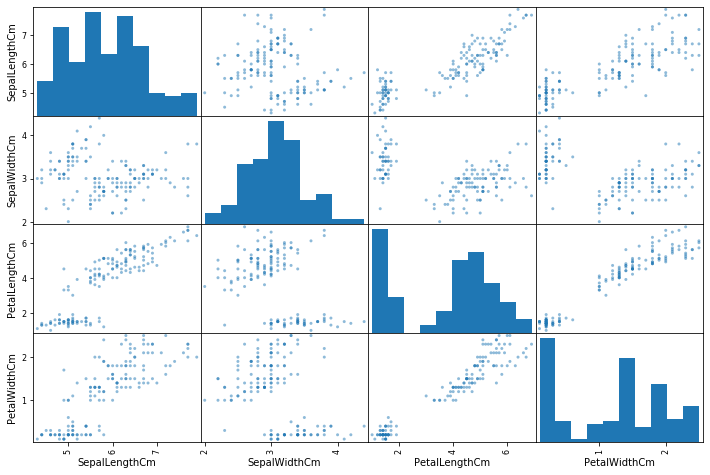

In [6]:
scatter_matrix(data[data.columns],figsize=(12,8))

## 2.4.- Transformación de los datos

No es necesario realizar ninguna transformación o darle algún formato a la base de datos.

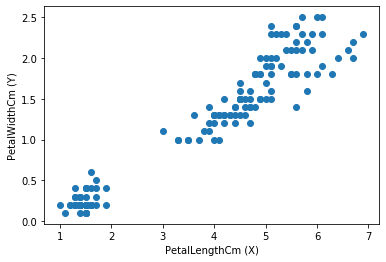

In [7]:
plt.scatter(data["PetalLengthCm"], data["PetalWidthCm"])
plt.ylabel("PetalWidthCm (Y)")
plt.xlabel("PetalLengthCm (X)")
plt.show()

## 2.5.- Minería de datos

### 2.5.1.- Partición de los datos

In [8]:
X_values = np.array(data[['PetalLengthCm']])
Y_values = np.array(data[['PetalWidthCm']])
x_train, x_test, y_train, y_test = train_test_split(
                                    X_values, 
                                    Y_values, 
                                    train_size=0.8, 
                                    random_state=0)
df = pd.DataFrame(x_train, columns=["PetalLengthCm"])
df = df.join(pd.DataFrame(y_train, columns=["PetalWidthCm"]))
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
PetalLengthCm    120 non-null float64
PetalWidthCm     120 non-null float64
dtypes: float64(2)
memory usage: 2.0 KB


,PetalLengthCm,PetalWidthCm
0,5.5,1.8
1,4.5,1.5
2,1.5,0.2
3,4.9,1.8
4,5.6,2.2
5,3.9,1.4
6,1.7,0.3
7,5.1,1.6
8,4.2,1.5
9,4.0,1.2


In [9]:
df2 = pd.DataFrame(x_test, columns=["PetalLengthCm"])
df2 = df2.join(pd.DataFrame(y_test, columns=["PetalWidthCm"]))
df2.info()
df2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
PetalLengthCm    30 non-null float64
PetalWidthCm     30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


,PetalLengthCm,PetalWidthCm
0,5.1,2.4
1,4.0,1.0
2,1.4,0.2
3,6.3,1.8
4,1.5,0.2
5,6.0,2.5
6,1.3,0.3
7,4.7,1.5
8,4.8,1.4
9,4.0,1.3


### 2.5.2.- Modelo de Regresión Lineal: Aprendizaje

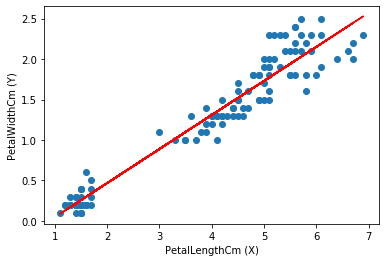

In [10]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(x_train, y_train)
 
# Construimos la ecuación de la línea de 
# estimación (en este caso, al ser 2D)
y_pred1 = regr.predict(x_train)

coef = float(regr.coef_[0])
termInd = float(regr.intercept_)

plt.scatter(x_train,
            y_train)
plt.plot(x_train, y_pred1, color='red')
plt.ylabel("PetalWidthCm (Y)")
plt.xlabel("PetalLengthCm (X)")
plt.show()

In [11]:
# Ecuacion de la recta
print("Y = " + str(coef) + "X " + str(termInd))

# Error Máximo
print("Error máximo: ", max_error(y_train, y_pred1))
# Error Medio Absoluto
print("Error medio absoluto: ", mean_absolute_error(y_train, y_pred1))
# Error Medio Cuadrado
print("Error medio cuadrado: ", mean_squared_error(y_train, y_pred1))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print("Puntuación varianza: ", r2_score(y_train, y_pred1))

Y = 0.42118973350340555X -0.376356491426745
Puntuación de regresión de varianza explicada:  0.9372909782995308
Error máximo:  0.5282888505593766
Error medio absoluto:  0.15211504466081788
Error medio cuadrado:  0.03749786112822555
Puntuación varianza:  0.9372909782995307


### 2.5.3.- Modelo de Regresión Lineal: Predicción

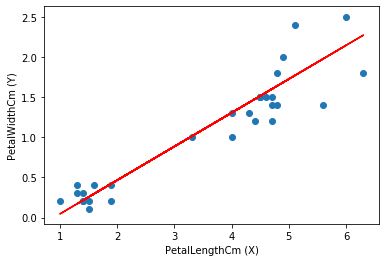

In [12]:
# Hacemos las predicciones 
# utilizando el modelo 
# (ecuacion de la línea de estimación)
y_pred2 = regr.predict(x_test)

plt.scatter(x_test,
            y_test)
plt.plot(x_test, y_pred2, color='red')
plt.ylabel("PetalWidthCm (Y)")
plt.xlabel("PetalLengthCm (X)")
plt.show()

### 2.5.3.- Evaluación del modelo

In [13]:
# Error Máximo
print("Error máximo: ", max_error(y_test, y_pred2))
# Error Medio Absoluto
print("Error medio absoluto: ", mean_absolute_error(y_test, y_pred2))
# Error Medio Cuadrado
print("Error medio cuadrado: ", mean_squared_error(y_test, y_pred2))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print("Puntuación varianza: ", r2_score(y_test, y_pred2))

Función de puntuación de regresión de varianza explicada:  0.8739811338984247
Error máximo:  0.6282888505593767
Error medio absoluto:  0.18355058283010275
Error medio cuadrado:  0.06213731552896662
Puntuación varianza:  0.8705742230181908


### 2.5.4.- Histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0E3256470>,
      dtype=object)

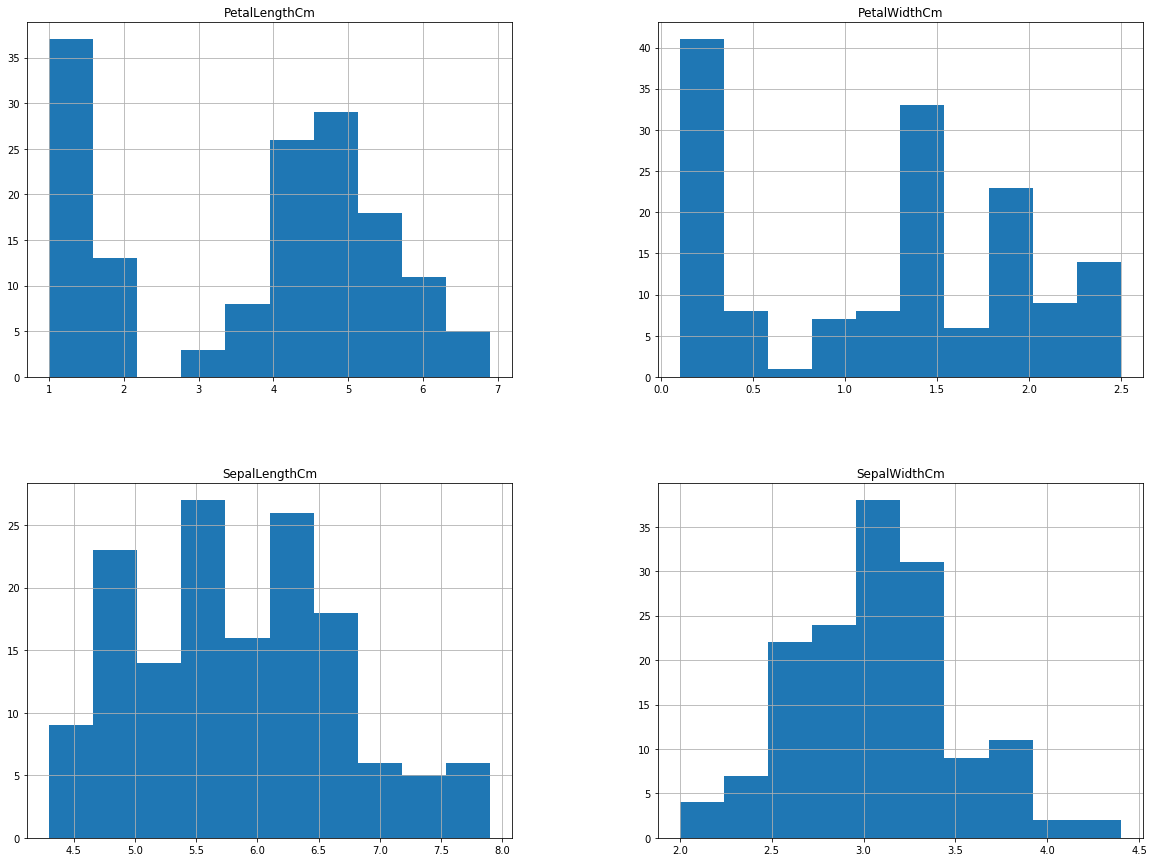

In [14]:
data.hist(figsize=(20,15))